In [1]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
import itertools
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn import datasets, linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, f1_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from imblearn.over_sampling import SMOTE

In [2]:
import os
path = "/Users/krittikakrishnan/Desktop/Insight Project"
os.chdir(path) #To change path to current directory

In [3]:
imperm = pd.read_csv("Impermanent Choices.csv")

In [4]:
semiperm = pd.read_csv("Semipermanent Choices.csv")

In [5]:
#Factorizing the "Method" columns
method_semiperm = semiperm[['CURRMETH1', 'Method']].drop_duplicates().sort_values('Method')
semiperm_method_id = dict(method_semiperm.values)
id_method_semiperm = dict(method_semiperm[['Method', 'CURRMETH1']].values)

method_imperm = imperm[['CURRMETH1', 'Method']].drop_duplicates().sort_values('Method')
imperm_method_id = dict(method_imperm.values)
id_method_imperm = dict(method_imperm[['Method', 'CURRMETH1']].values)

# Splitting Dataset into train/test

In [6]:
##SPLITTING INTO TRAIN AND TEST DATA WITH SCI KIT LEARN FOR IMPERM TYPES
y_imperm = imperm['Method']
columns_imperm = "RSCRAGE RSCRRACE MARSTAT".split()
imperm_test = pd.DataFrame(imperm, columns = columns_imperm)
X_imperm_train, X_imperm_test, y_imperm_train, y_imperm_test = train_test_split(imperm_test,y_imperm, random_state = 42)

In [7]:
##SPLITTING INTO TRAIN AND TEST DATA WITH SCI KIT LEARN FOR SEMIPERM TYPES
y_semiperm = semiperm['Method']
columns_semiperm = "RSCRAGE RSCRRACE MARSTAT".split()
semiperm_test = pd.DataFrame(semiperm, columns = columns_semiperm)
X_semiperm_train, X_semiperm_test, y_semiperm_train, y_semiperm_test = train_test_split(semiperm_test,y_semiperm, random_state = 42)

# Gaussian Naive Bayes Classifier

We will first start by trying a Gaussian Naive Bayes classifier to see if it does a good job at classification.

In [8]:
###TRYING GAUSSIAN NAIVE BAYES MODEL
gnb = GaussianNB()
clf_imperm = gnb.fit(X_imperm_train, y_imperm_train)
clf_imperm_predictions = clf_imperm.predict(X_imperm_test)
clf_imperm_prob = clf_imperm.predict_proba(X_imperm_test)

# GB accuracy on X_test
clf_imperm_accuracy = clf_imperm.score(X_imperm_test, y_imperm_test)
print(clf_imperm_accuracy)
 
# GB creating a confusion matrix
clf_imperm_cm = confusion_matrix(y_imperm_test, clf_imperm_predictions)
print(np.unique(clf_imperm_predictions))

0.5575606720597387
[0 2]


Text(0,0.5,'Predictions')

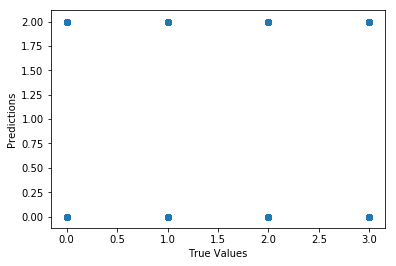

In [9]:
###PLOTTING GAUSSIAN NAIVE BAYES MODEL for IMPERM types
plt.scatter(y_imperm_test, clf_imperm_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [10]:
###TRYING GAUSSIAN NAIVE BAYES MODEL
gnb = GaussianNB()
clf_semiperm = gnb.fit(X_semiperm_train, y_semiperm_train)
clf_semiperm_predictions = clf_semiperm.predict(X_semiperm_test)
clf_semiperm_prob = clf_semiperm.predict_proba(X_semiperm_test)

# GB accuracy on X_test
clf_semiperm_accuracy = clf_semiperm.score(X_semiperm_test, y_semiperm_test)
print(clf_semiperm_accuracy)
 
# GB creating a confusion matrix
clf_semiperm_cm = confusion_matrix(y_semiperm_test, clf_semiperm_predictions)
print(np.unique(clf_semiperm_predictions))

0.6577181208053692
[0 1 2]


In [11]:
###PLOTTING CONFUSION MATRIX
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


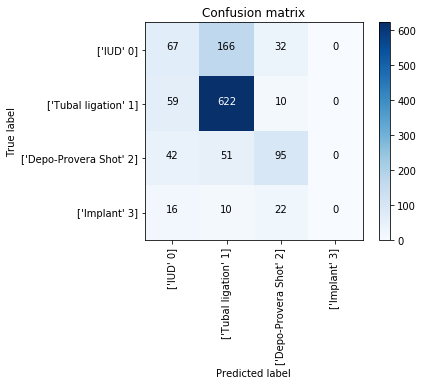

In [12]:
semiperm_labels = method_semiperm.values
semiperm_labels
plot_confusion_matrix(clf_semiperm_cm, semiperm_labels)

Confusion matrix, without normalization


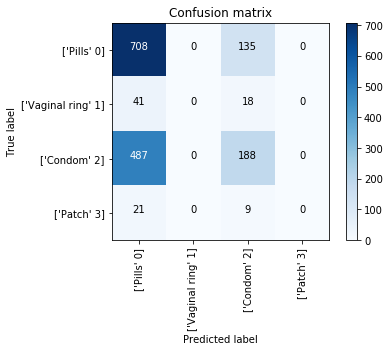

In [13]:
imperm_labels = method_imperm.values
imperm_labels
plot_confusion_matrix(clf_imperm_cm, imperm_labels)

Next we will try a random forest because it handles imbalanced datasets better and lets you view feature importance

# RandomForestClassifier

In [14]:
###TRYING RANDOM FOREST CLASSIFIER
RF = RandomForestClassifier()
RF_imperm = RF.fit(X_imperm_train, y_imperm_train)
RF_imperm_predictions = RF_imperm.predict(X_imperm_test)
RF_imperm_prob = RF_imperm.predict_proba(X_imperm_test)

# RF accuracy on X_test
RF_imperm_accuracy = RF_imperm.score(X_imperm_test, y_imperm_test)
print(RF_imperm_accuracy)

#RF accuracy on X_train
RF_imperm_train_accuracy = RF_imperm.score(X_imperm_train, y_imperm_train)
print(RF_imperm_train_accuracy)

#RF recall on X_test
RF_imperm_recall = recall_score(y_imperm_test, RF_imperm_predictions, average = 'macro')
print(RF_imperm_recall)

#RF F1 score
RF_imperm_f1 = f1_score(y_imperm_test, RF_imperm_predictions, average = 'macro')
print(RF_imperm_f1)
 
# RF creating a confusion matrix
RF_imperm_cm = confusion_matrix(y_imperm_test, RF_imperm_predictions)
print(np.unique(RF_imperm_predictions))

0.5625388923459863
0.6288381742738589
0.28661658099380516
0.27461446924789
[0 1 2 3]


In [15]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
results = model_selection.cross_val_score(RF, imperm_test, y_imperm, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.584


Confusion matrix, without normalization


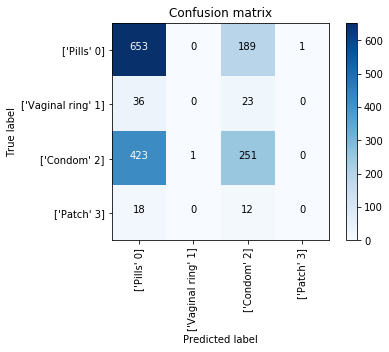

In [16]:
###PLOTTING IMPERM CONFUSION MATRIX
imperm_labels = method_imperm.values
imperm_labels
plot_confusion_matrix(RF_imperm_cm, imperm_labels)

In [17]:
###TRYING RF MODEL
RF = RandomForestClassifier()
RF_semiperm = RF.fit(X_semiperm_train, y_semiperm_train)
RF_semiperm_predictions = RF_semiperm.predict(X_semiperm_test)
RF_semiperm_prob = RF_semiperm.predict_proba(X_semiperm_test)

# RF accuracy on X_test
RF_semiperm_accuracy = RF_semiperm.score(X_semiperm_test, y_semiperm_test)
print(RF_semiperm_accuracy)

#RF accuracy on X_train
RF_semiperm_train_accuracy = RF_semiperm.score(X_semiperm_train, y_semiperm_train)
print(RF_semiperm_train_accuracy)

#RF precision on X_test
RF_semiperm_precision = precision_score(y_semiperm_test, RF_semiperm_predictions, average = 'macro')
print(RF_semiperm_precision)

#RF recall on X_test
RF_semiperm_recall = recall_score(y_semiperm_test, RF_semiperm_predictions, average = 'macro')
print(RF_semiperm_recall)

#RF F1 score
RF_semiperm_f1 = f1_score(y_semiperm_test, RF_semiperm_predictions, average = 'macro')
print(RF_semiperm_f1)
 
# RF creating a confusion matrix
RF_semiperm_cm = confusion_matrix(y_semiperm_test, RF_semiperm_predictions)
print(np.unique(RF_semiperm_predictions))

0.6635906040268457
0.6787013713965855
0.4907573232214693
0.4175096471271493
0.43208889764819375
[0 1 2 3]


# Attempting 10-fold cross validation to see average accuracy

In [18]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
results = model_selection.cross_val_score(RF, semiperm_test, y_semiperm, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.646


Confusion matrix, without normalization


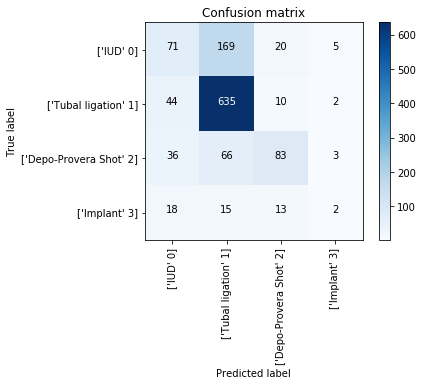

In [19]:
###PLOTTIING SEMIPERM CONFUSION MATRIX
semiperm_labels = method_semiperm.values
semiperm_labels
plot_confusion_matrix(RF_semiperm_cm, semiperm_labels)

The random forest is classifying from all 4 classes, but still isn't doing a great job. We're going to need to oversample the minority classes to 1) help the random forest make better suggestions and 2) make the suggestion more relevant to the reddit users as well. Make sure, when oversampling, to SPLIT the datasets into training and test and ONLY oversample the training set, not the test set. You want to avoid "bleed" 

# Balancing class weights within RandomForestClassifier

In [20]:
###TRYING RANDOM FOREST CLASSIFIER
RF_bal = RandomForestClassifier(class_weight = {0:1, 1:2, 2:1, 3:2})
RF_bal_imperm = RF_bal.fit(X_imperm_train, y_imperm_train)
RF_bal_imperm_predictions = RF_bal_imperm.predict(X_imperm_test)
RF_bal_imperm_prob = RF_bal_imperm.predict_proba(X_imperm_test)

# RF accuracy on X_test
RF_bal_imperm_accuracy = RF_bal_imperm.score(X_imperm_test, y_imperm_test)
print(RF_bal_imperm_accuracy)

#RF recall on X_test
RF_bal_imperm_recall = recall_score(y_imperm_test, RF_bal_imperm_predictions, average = 'macro')
print(RF_bal_imperm_recall)

#RF F1 score
RF_bal_imperm_f1 = f1_score(y_imperm_test, RF_bal_imperm_predictions, average = 'macro')
print(RF_bal_imperm_f1)

# RF creating a confusion matrix
RF_bal_imperm_cm = confusion_matrix(y_imperm_test, RF_bal_imperm_predictions)
print(np.unique(RF_bal_imperm_predictions))

0.5619166148102054
0.2872057466719388
0.2766412418578058
[0 1 2 3]


Confusion matrix, without normalization


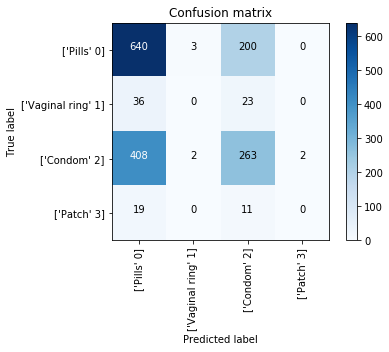

In [21]:
###PLOTTING SEMIPERM resampled CONFUSION MATRIX
imperm_labels = method_imperm.values
imperm_labels
plot_confusion_matrix(RF_bal_imperm_cm, imperm_labels)

Class_weight = 'balanced' dropped accuracy and recall by ~20%. 

Class_weight = {0:1, 1:2, 2:1, 3:2} did nothing to improve the model from just the regular RandomForestClassifier

# SMOTE and RandomForestClassifier

In [58]:
#SMOTE function:

sm = SMOTE(kind = 'regular', k_neighbors = 25)

In [59]:
#SMOTE for imperm first:

x_imperm_res, y_imperm_res = sm.fit_sample(X_imperm_train, y_imperm_train)

In [60]:
###TRYING RANDOM FOREST CLASSIFIER WITH SMOTE
RF = RandomForestClassifier()
RF_imperm_res = RF.fit(x_imperm_res, y_imperm_res)
RF_imperm_res_predictions = RF_imperm_res.predict(X_imperm_test)
RF_imperm_res_prob = RF_imperm_res.predict_proba(X_imperm_test)

# RF accuracy on X_test
RF_imperm_res_accuracy = RF_imperm_res.score(X_imperm_test, y_imperm_test)
print(RF_imperm_res_accuracy)

#RF recall on X_test
RF_imperm_res_recall = recall_score(y_imperm_test, RF_imperm_res_predictions, average = 'macro')
print(RF_imperm_res_recall)

#RF F1 score
RF_imperm_res_f1 = f1_score(y_imperm_test, RF_imperm_res_predictions, average = 'macro')
print(RF_imperm_res_f1)
 
# RF creating a confusion matrix
RF_imperm_res_cm = confusion_matrix(y_imperm_test, RF_imperm_res_predictions)
print(np.unique(RF_imperm_res_predictions))

0.5488487865588052
0.2842256491366812
0.27630195231817883
[0 1 2 3]


Confusion matrix, without normalization


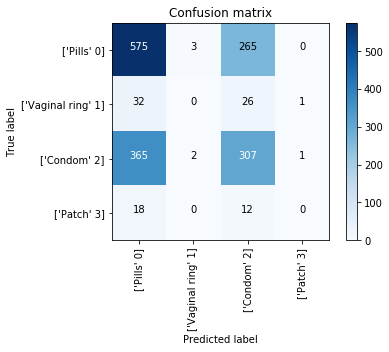

In [61]:
###PLOTTING IMPERM resampled CONFUSION MATRIX
imperm_labels = method_imperm.values
imperm_labels
plot_confusion_matrix(RF_imperm_res_cm, imperm_labels)

Wow, surprisingly SMOTE doesn't help with the accuracy, and only slightly improves recall on the impermanent groups. The sacrifice on precision isn't worth the slight percentage increase in recall. 

In [62]:
#SMOTE for semiperm:
x_semiperm_res, y_semiperm_res = sm.fit_sample(X_semiperm_train, y_semiperm_train)

In [63]:
###TRYING RF MODEL
RF = RandomForestClassifier()
RF_semiperm_res = RF.fit(x_semiperm_res, y_semiperm_res)
RF_semiperm_res_predictions = RF_semiperm_res.predict(X_semiperm_test)
RF_semiperm_res_prob = RF_semiperm_res.predict_proba(X_semiperm_test)

# RF accuracy on X_test
RF_semiperm_res_accuracy = RF_semiperm_res.score(X_semiperm_test, y_semiperm_test)
print(RF_semiperm_res_accuracy)

# RF accuracy on X_test
RF_semiperm_res_train_accuracy = RF_semiperm_res.score(X_semiperm_train, y_semiperm_train)
print(RF_semiperm_res_train_accuracy)

#RF recall on X_test
RF_semiperm_res_recall = recall_score(y_semiperm_test, RF_semiperm_res_predictions, average = 'macro')
print(RF_semiperm_res_recall)

# RF creating a confusion matrix
RF_semiperm_res_cm = confusion_matrix(y_semiperm_test, RF_semiperm_res_predictions)
print(np.unique(RF_semiperm_res_predictions))

0.6258389261744967
0.6647075286873776
0.42003238915280733
[0 1 2 3]


Confusion matrix, without normalization


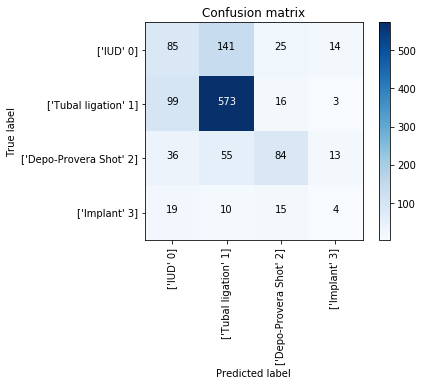

In [64]:
###PLOTTING SEMIPERM resampled CONFUSION MATRIX
semiperm_labels = method_semiperm.values
semiperm_labels
plot_confusion_matrix(RF_semiperm_res_cm, semiperm_labels)

Same with semipermanent types. SMOTE doesn't help with the accuracy, and only slightly improves recall on the semipermanent groups. Not worth the sacrifice in precision. 

In [29]:
#SMOTE function(2):
sm1 = SMOTE(random_state = 12, ratio = 1.0)

Note: Got some warnings when I tried to use SMOTE(random_state = 12, ratio = 1.0). Seemed like the ratio aspect of the function has deprecated. 

In [30]:
#SMOTE1 for imperm first:

x_imperm_res1, y_imperm_res1 = sm1.fit_sample(X_imperm_train, y_imperm_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [31]:
###TRYING RANDOM FOREST CLASSIFIER WITH SMOTE
RF = RandomForestClassifier()
RF_imperm_res1 = RF.fit(x_imperm_res1, y_imperm_res1)
RF_imperm_res1_predictions = RF_imperm_res1.predict(X_imperm_test)
RF_imperm_re1s_prob = RF_imperm_res1.predict_proba(X_imperm_test)

# RF accuracy on X_test
RF_imperm_res1_accuracy = RF_imperm_res1.score(X_imperm_test, y_imperm_test)
print(RF_imperm_res1_accuracy)

#RF recall on X_test
RF_imperm_res1_recall = recall_score(y_imperm_test, RF_imperm_res1_predictions, average = 'macro')
print(RF_imperm_res1_recall)
 
# RF creating a confusion matrix
RF_imperm_res1_cm = confusion_matrix(y_imperm_test, RF_imperm_res1_predictions)
print(np.unique(RF_imperm_res1_predictions))

0.5015556938394524
0.28898464813809527
[0 1 2 3]


Confusion matrix, without normalization


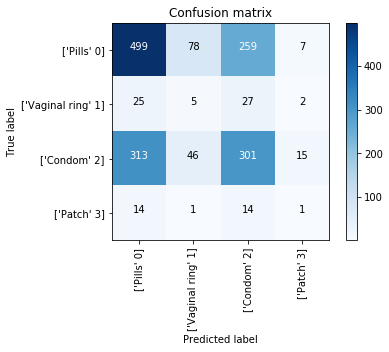

In [32]:
###PLOTTING SEMIPERM resampled CONFUSION MATRIX
imperm_labels = method_imperm.values
imperm_labels
plot_confusion_matrix(RF_imperm_res1_cm, imperm_labels)

Welp, that didn't work well either. Accuracy got MUCH worse. Oh well. 

# Using StratifiedShuffleSplit on train/test set

In [33]:
##FOR IMPERM TYPES
y_imperm = imperm['Method']
columns_imperm = "RSCRAGE RSCRRACE MARSTAT".split()
imperm_test = pd.DataFrame(imperm, columns = columns_imperm)

sss = StratifiedShuffleSplit(n_splits = 3, test_size = 0.25, random_state = 42)
sss.get_n_splits(imperm_test,y_imperm)

for train_index, test_index in sss.split(imperm_test, y_imperm):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_imperm_sss, X_imperm_test_sss = imperm_test.iloc[train_index], imperm_test.iloc[test_index]
    y_imperm_sss, y_imperm_test_sss = y_imperm[train_index], y_imperm[test_index]

TRAIN: [4208 3433 4685 ... 3121 1682 5068] TEST: [2415 2301 6270 ... 1855  491  184]
TRAIN: [ 295 1036 3363 ... 5061 1136 5693] TEST: [ 530  639 1468 ... 1105 3961 1509]
TRAIN: [2871 3132 4444 ...  531 4994 6424] TEST: [1908 1087 1778 ... 5761 4915  945]


In [34]:
###TRYING RANDOM FOREST CLASSIFIER with SSS
RF_sss = RandomForestClassifier()
RF_sss_imperm = RF_sss.fit(X_imperm_sss, y_imperm_sss)
RF_sss_imperm_predictions = RF_sss_imperm.predict(X_imperm_test_sss)
RF_sss_imperm_prob = RF_sss_imperm.predict_proba(X_imperm_test_sss)

# RF accuracy on X_test
RF_sss_imperm_accuracy = RF_sss_imperm.score(X_imperm_test_sss, y_imperm_test_sss)
print(RF_sss_imperm_accuracy)

#RF recall on X_test
RF_sss_imperm_recall = recall_score(y_imperm_test_sss, RF_sss_imperm_predictions, average = 'macro')
print(RF_sss_imperm_recall)

#RF F1 score
RF_sss_imperm_f1 = f1_score(y_imperm_test, RF_sss_imperm_predictions, average = 'macro')
print(RF_sss_imperm_f1)
 
# RF creating a confusion matrix
RF_sss_imperm_cm = confusion_matrix(y_imperm_test_sss, RF_sss_imperm_predictions)
print(np.unique(RF_sss_imperm_predictions))

0.5724953329184816
0.2869391709328783
0.23466050473616468
[0 1 2]


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix, without normalization


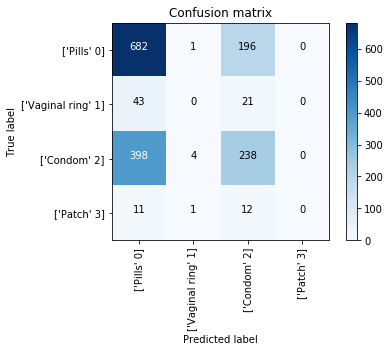

In [35]:
###PLOTTING SEMIPERM resampled CONFUSION MATRIX
imperm_labels = method_imperm.values
imperm_labels
plot_confusion_matrix(RF_sss_imperm_cm, imperm_labels)

The accuracy and recall increase (slightly), but when you look at the confusion matrix, the two minority classes are not recalled AT ALL. Not a great model to use. 

# Why is our training set validation so low?

It could be bcause of a few things:

1) Tree depth is not deep enough. But mine is set to the default in RF which is the deepest till it achieves gini purity. 
2) Features are insufficient to achieve purity in the leaves of the tree. 


It could be that the multiple random forests are actually decreasing the accuracy of our model. Let's just try one simple decision tree. 

In [36]:
from sklearn import tree

dt_clf = DecisionTreeClassifier()
dt_clf_imperm = dt_clf.fit(X_imperm_train, y_imperm_train)

In [37]:
dt_clf_imperm_predictions = dt_clf_imperm.predict(X_imperm_test)
dt_clf_imperm_prob = dt_clf_imperm.predict_proba(X_imperm_test)

# RF accuracy on X_test
dt_clf_imperm_accuracy = dt_clf_imperm.score(X_imperm_test, y_imperm_test)
print(dt_clf_imperm_accuracy)

#RF accuracy on X_train
dt_clf_imperm_train_accuracy = dt_clf_imperm.score(X_imperm_train, y_imperm_train)
print(dt_clf_imperm_train_accuracy)

#RF recall on X_test
dt_clf_imperm_recall = recall_score(y_imperm_test, dt_clf_imperm_predictions, average = 'macro')
print(dt_clf_imperm_recall)

#RF F1 score
dt_clf_imperm_f1 = f1_score(y_imperm_test, dt_clf_imperm_predictions, average = 'macro')
print(dt_clf_imperm_f1)

dt_clf_imperm_cm = confusion_matrix(y_imperm_test, dt_clf_imperm_predictions)
print(np.unique(dt_clf_imperm_predictions))

0.5532047293092719
0.6307053941908713
0.2815038882298669
0.2691981652185419
[0 1 2]


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# The RandomForest worked best, so let's stick with that one.

In [38]:
##Save classifier for semiperm model:
filename = '/Users/krittikakrishnan/Desktop/Insight Project/RF_semiperm_model'
pickle.dump(RF_semiperm, open(filename, 'wb'))

##Save classifier for imperm model:
filename = '/Users/krittikakrishnan/Desktop/Insight Project/RF_imperm_model'
pickle.dump(RF_imperm, open(filename, 'wb'))

##Save input:
# filename = '/Users/krittikakrishnan/Desktop/Insight Project/dash_input'
# pickle.dump(test1, open(filename, 'wb'))

###Save method declassifier for semiperm data
filename = '/Users/krittikakrishnan/Desktop/Insight Project/method_semiperm'
pickle.dump(method_semiperm, open(filename, 'wb'))

###Save method declassifier for imperm data
filename = '/Users/krittikakrishnan/Desktop/Insight Project/method_imperm'
pickle.dump(method_imperm, open(filename, 'wb'))

In [39]:
##Change directory
path1 = "/Users/krittikakrishnan/Desktop/Insight Project/Dash Web App"
os.chdir(path1) #To change path to current directory
method1 = pickle.load(open('method_imperm', 'rb'))